In [ ]:
import os
import PIL
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import h5py
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
%matplotlib inline
import keras
import tensorflow.keras
from __future__ import print_function, division
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
print(keras.__version__)

2.8.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


```  with zipfile.ZipFile('/content/drive/MyDrive/olddata/brainTumorDataPublic_1-766.zip') as zf:
  os.mkdir('/content/drive/MyDrive/olddata/set1')
  zip_dir = zf.namelist()[0]
  zf.extractall('/content/drive/MyDrive/olddata/set1')[link text](https://)```

```  with zipfile.ZipFile('/content/drive/MyDrive/olddata/brainTumorDataPublic_767-1532.zip') as zf:
  os.mkdir('/content/drive/MyDrive/olddata/set2')
  zip_dir = zf.namelist()[0]
  zf.extractall('/content/drive/MyDrive/olddata/set2')  ```

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/olddata/brainTumorDataPublic_1533-2298.zip') as zf:
  os.mkdir('/content/drive/MyDrive/olddata/set3')
  zip_dir = zf.namelist()[0]
  zf.extractall('/content/drive/MyDrive/olddata/set3')

with zipfile.ZipFile('/content/drive/MyDrive/olddata/brainTumorDataPublic_2299-3064.zip') as zf:
  os.mkdir('/content/drive/MyDrive/olddata/set4')
  zip_dir = zf.namelist()[0]
  zf.extractall('/content/drive/MyDrive/olddata/set4')

In [ ]:
os.mkdir('/content/drive/MyDrive/olddata/imgData')

In [ ]:
!mv /content/drive/MyDrive/olddata/set1/*.mat  '/content/drive/MyDrive/olddata/imgData/'
!mv /content/drive/MyDrive/olddata/set2/*.mat  '/content/drive/MyDrive/olddata/imgData/'
!mv /content/drive/MyDrive/olddata/set3/*.mat  '/content/drive/MyDrive/olddata/imgData/'
!mv /content/drive/MyDrive/olddata/set4/*.mat  '/content/drive/MyDrive/olddata/imgData/'

In [ ]:
os.mkdir('/content/drive/MyDrive/olddata/new_imgData/img')

In [ ]:
filename = None
labels=[]
for filename in range(1,3065):
  with h5py.File('/content/drive/MyDrive/c/copy/olddata/imgData/{}.mat'.format(filename), 'r') as f:
      #img = f['cjdata']['image']
      label = f['cjdata']['label'][0][0]
      labels.append(int(label))

``` filename = None

for filename in range(1, 3065):
  with h5py.File('/content/drive/MyDrive/olddata/imgData/{}.mat'.format(filename), 'r') as f:
      img = f['cjdata']['image']
      label = f['cjdata']['label'][0][0]
      labels.append(int(label))
      img = np.array(img, dtype=np.float32)
      img = cv2.resize(img,(64,64))
      plt.axis('off')
      plt.imsave("/content/drive/MyDrive/olddata/new_imgData/img/{}.jpg".format(filename), img, cmap='gray')
      
      
print("{} files successfully saved".format(filename))
```

In [ ]:
label_names = np.array(labels, dtype=np.int64)
print(label_names.shape)
training_data = []

(3064,)


In [ ]:
X_train = np.ndarray(shape=(3064,64,64),dtype=np.float32)
#x_train = np.ndarray(shape=(2451,64,64),dtype=np.uint8)
Y_train = np.ndarray(shape=(3064,3),dtype=np.uint8)
#x_test = np.ndarray(shape=(613,64,64),dtype=np.uint8)
#y_test = np.ndarray(shape=(613,),dtype=np.uint8)

In [ ]:
from keras.utils.np_utils import to_categorical
for i in range(1, 3065):
  img = cv2.imread("/content/drive/MyDrive/c/copy/olddata/new_imgData/img/{}.jpg".format(i),0)
  #label = label_names[i-1] -1
  #training_data.append([img, label])
  X_train[i-1] = img
  #Y_train[i-1] = label

#print("shape: {} label: {} | {} samples successfully preprocessed".format(img.shape, label, i))

In [ ]:
from keras.utils.np_utils import to_categorical 
Y_train = to_categorical(labels,num_classes = 3)

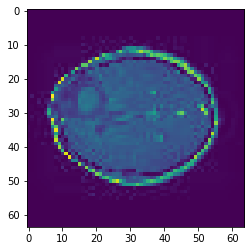

In [ ]:
plt.imshow(x_test[0], interpolation='nearest')
plt.show()


np.save("xtrain",X_train)
np.save("ytrain",Y_train)
np.save("trainingdata",training_data)

In [ ]:
Y_train = np.load("/content/drive/MyDrive/npdata/ytrain.npy")
X_train = np.load("/content/drive/MyDrive/npdata/trainx.npy")

In [ ]:
y_test[0]

array([0, 1, 0], dtype=uint8)

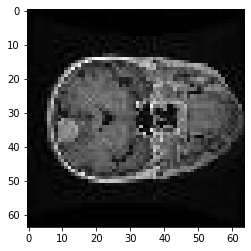

In [ ]:
plt.imshow(mg_test[0], cmap="gray")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.3,shuffle=True)
#x_valid,x_test,y_valid,y_test = train_test_split(x_test,y_test,test_size=0.5,shuffle=True)
x_train,x_test = x_train/127.5-1,x_test/127.5-1

In [ ]:
class_type = ["meningioma","glioma","pituitary"]
x_train.shape

(2144, 64, 64)

In [ ]:
j = 1
for x in range(x_test.shape[0]):
  img = x_test[x]
  label = np.argmax(y_test[x])
  if label == 0:
    plt.imsave("/content/drive/MyDrive/test/meningioma/{}.jpg".format(j),img,cmap="gray")
    j+=1


In [ ]:
j = 1
for x in range(x_test.shape[0]):
  img = x_test[x]
  label = np.argmax(y_test[x])
  if label == 1:
    plt.imsave("/content/drive/MyDrive/test/glioma/{}.jpg".format(j),img,cmap="gray")
    j+=1


In [ ]:
j = 1
for x in range(x_test.shape[0]):
  img = x_test[x]
  label = np.argmax(y_test[x])
  if label == 2:
    plt.imsave("/content/drive/MyDrive/test/pituitary/{}.jpg".format(j),img,cmap="gray")
    j+=1


In [ ]:
from PIL import Image
j=1
for i in range(len(x_test)):
  img = x_test[i]
  ind = class_type[np.argmax(y_test[i])]
  plt.imsave("/content/drive/MyDrive/test/{}/{}.jpg".format(ind,j),img,cmap="gray")
  j+=1

In [ ]:
class DCGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 64
        self.img_cols = 64
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 128

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def build_generator(self):
        print("--------Generator---------------")
        model = Sequential()
        model.add(Dense(8192 *1 *1 ,input_dim=128))
        model.add(Activation("relu"))
        
        #model.add(Dense(512 * 4 * 4, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((4, 4, 512),input_shape=(4*4*512,)))
        model.add(UpSampling2D(size=(2, 2)))
        model.add(Conv2D(256,(5,5),strides=1,padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(UpSampling2D(size=(2, 2)))
        model.add(Conv2D(128,(5,5),strides=1,padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(UpSampling2D(size=(2, 2)))
        model.add(Conv2D(64,(5,5), strides=1,padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(UpSampling2D(size=(2, 2)))
        model.add(Conv2D(1, (3,3), strides=1,padding="same"))
        model.add(Activation("tanh"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):
        print("--------Discriminator---------------")
        model = Sequential()
        
        model.add(
            Conv2D(64, (5, 5),
            strides=1,
            input_shape=(64, 64, 1))
            )
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(64, (5, 5),strides=1))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(64, (5, 5),strides=1))
        model.add(Activation('relu'))
        model.add(Dropout(0.5))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Reshape((1,1,1024)))
        model.add(Flatten())
        model.add(Dense(800))
        model.add(Activation('relu'))
        model.add(Dropout(0.5))
        model.add(Dense(800))
        model.add(Activation('relu'))
        model.add(Dropout(0.5))
        model.add(Dense(1))
        model.add(Activation('sigmoid'))
        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=64, save_interval=50):

        # Load the dataset
        # Rescale -1 to 1
        global X_train 
        X_train = X_train / 127.5 - 1
        X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):


            # Select a random half of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator (real classified as ones and generated as zeros)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------#
            #  Train Generator
        

            # Train the generator (wants discriminator to mistake images as real)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch == 10000:
              self.discriminator.save("/content/drive/MyDrive/model/newdis15.h5")
            if epoch % save_interval == 0:
                self.save_imgs(epoch)
                

    def save_imgs(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("/content/drive/MyDrive/images/apr-6_%d.png" % epoch)
        plt.close()


    dcgan = DCGAN()
    dcgan.train(epochs=10001, batch_size=64, save_interval=50)

In [ ]:
dcgan = DCGAN()
dcgan.train(epochs=10001, batch_size=64, save_interval=50)

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/model/dis_model.h5',compile=False)

In [ ]:
md = Sequential(model.layers[1].layers[:15])
md.add(Dense(3,activation="softmax"))


In [ ]:
for i in md.layers:
  i.trainable = True
for i in md.layers:
  print(i,i.trainable)

#md.summary()

In [ ]:
md.layers[15].trainable = True
#md.summary()

In [ ]:
opt = tensorflow.keras.optimizers.SGD(
    learning_rate=0.01)


md.compile( loss = "categorical_crossentropy", 
               optimizer = "adam", 
               metrics=['accuracy']
             )

In [ ]:
history = md.fit(x_train,y_train,validation_data=(x_valid,y_valid),epochs=15)

Epoch 1/15
67/67 [==============================] - 11s 16ms/step - loss: 0.6813 - accuracy: 0.6908 - val_loss: 0.5293 - val_accuracy: 0.7870
Epoch 2/15
67/67 [==============================] - 1s 10ms/step - loss: 0.4414 - accuracy: 0.8060 - val_loss: 0.4623 - val_accuracy: 0.8174
Epoch 3/15
67/67 [==============================] - 1s 9ms/step - loss: 0.3181 - accuracy: 0.8713 - val_loss: 0.3159 - val_accuracy: 0.9065
Epoch 4/15
67/67 [==============================] - 1s 9ms/step - loss: 0.2125 - accuracy: 0.9165 - val_loss: 0.2460 - val_accuracy: 0.9174
Epoch 5/15
67/67 [==============================] - 1s 9ms/step - loss: 0.1773 - accuracy: 0.9282 - val_loss: 0.2441 - val_accuracy: 0.9283
Epoch 6/15
67/67 [==============================] - 1s 9ms/step - loss: 0.1586 - accuracy: 0.9431 - val_loss: 0.1839 - val_accuracy: 0.9130
Epoch 7/15
67/67 [==============================] - 1s 9ms/step - loss: 0.0933 - accuracy: 0.9627 - val_loss: 0.1841 - val_accuracy: 0.9283
Epoch 8/15
67/67 

15/15 - 0s - loss: 0.1629 - accuracy: 0.9435 - 69ms/epoch - 5ms/step


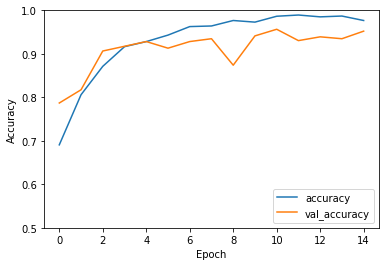

In [ ]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = md.evaluate(x_test,  y_test, verbose=2)


In [ ]:
print(test_acc)

0.9434782862663269


```        0.958876346623446```

In [ ]:
s = md.predict(x_test[-20:])

In [ ]:
metric = tensorflow.metrics.F1Score(num_classes=3, threshold=0.5)
y_true = y_test[-20:]
y_pred = np.array([[0.2, 0.6, 0.7],
                   [0.2, 0.6, 0.6],
                   [0.6, 0.8, 0.0]], np.float32)
metric.update_state(y_true, y_pred)
result = metric.result()
result.numpy()



In [ ]:
mdd = keras.models.load_model("/content/drive/MyDrive/finalmodel/model.h5")

In [ ]:
mg_test = np.ndarray(shape=(282,64,64),dtype=np.float32)

In [ ]:
for i in range(1,283):
  img = cv2.imread("/content/drive/MyDrive/test/pituitary/{}.jpg".format(i),0)
  mg_test[i-1]=img

In [ ]:
pred = mdd.predict(mg_test)
pred = np.argmax(pred,axis=1)

In [ ]:
pred

array([2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1,
       1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1])

In [ ]:
j=1
for x in range(len(pred)):
  if pred[x] == 2:
    img = mg_test[x]
    plt.imsave("/content/drive/MyDrive/real/pituitary/{}.jpg".format(j),img,cmap="gray")
    j+=1


In [ ]:
y_test_new = np.argmax(y_test,axis=1)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       102
           1       0.91      0.98      0.94       210
           2       1.00      0.98      0.99       148

    accuracy                           0.94       460
   macro avg       0.95      0.93      0.94       460
weighted avg       0.94      0.94      0.94       460



[Text(0, 0.5, 'meningioma'), Text(0, 1.5, 'glioma'), Text(0, 2.5, 'pituitary')]

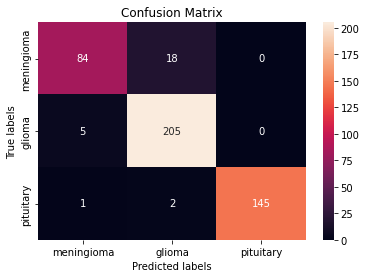

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

ax = plt.subplot()

cm = confusion_matrix(y_test_new,pred)
f = sns.heatmap(cm, annot=True, fmt='d',ax=ax)


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(class_type); ax.yaxis.set_ticklabels(class_type)

In [ ]:
gli=np.ndarray(shape=(5,64,64),dtype=np.float32)
men=np.ndarray(shape=(5,64,64),dtype=np.float32)
no=np.ndarray(shape=(5,64,64),dtype=np.float32)
pi=np.ndarray(shape=(5,64,64),dtype=np.float32)

In [ ]:

for i in range(1, 6):
  img = cv2.imread("/content/drive/MyDrive/other/Testing/glioma_tumor/{}.jpg".format(i),0)
  img=cv2.resize(img,(64,64))
  #label = label_names[i-1] -1
  #training_data.append([img, label])
  gli[i-1] = img
  #Y_train[i-1] = label

#print("shape: {} label: {} | {} samples successfully preprocessed".format(img.shape, label, i))

In [ ]:

for i in range(1, 6):
  img = cv2.imread("/content/drive/MyDrive/other/Testing/meningioma_tumor/{}.jpg".format(i),0)
  img=cv2.resize(img,(64,64))
  #label = label_names[i-1] -1
  #training_data.append([img, label])
  men[i-1] = img
  #Y_train[i-1] = label

#print("shape: {} label: {} | {} samples successfully preprocessed".format(img.shape, label, i))

In [ ]:

for i in range(1, 6):
  img = cv2.imread("/content/drive/MyDrive/other/Testing/no_tumor/{}.jpg".format(i),0)
  img=cv2.resize(img,(64,64))
  #label = label_names[i-1] -1
  #training_data.append([img, label])
  no[i-1] = img
  #Y_train[i-1] = label

#print("shape: {} label: {} | {} samples successfully preprocessed".format(img.shape, label, i))

In [ ]:

for i in range(1, 6):
  img = cv2.imread("/content/drive/MyDrive/other/Testing/pituitary_tumor/{}.jpg".format(i),0)
  img=cv2.resize(img,(64,64))
  #label = label_names[i-1] -1
  #training_data.append([img, label])
  pi[i-1] = img
  #Y_train[i-1] = label

#print("shape: {} label: {} | {} samples successfully preprocessed".format(img.shape, label, i))

In [ ]:
s=md.predict(gli[:5])
for i in s:
  print(np.argmax(i))

2
0
2
2
2


In [ ]:
s=md.predict(men[:5])
for i in s:
  print(np.argmax(i))

0
2
2
2
2


In [ ]:
s=md.predict(no[:5])
for i in s:
  print(np.argmax(i))

0
0
0
0
2


In [ ]:
s=md.predict(pi[:5])
for i in s:
  print(np.argmax(i))

2
2
2
2
2


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X_train):
   x_train, x_test = X_train[train_index], X_train[test_index]
   y_train, y_test = Y_train[train_index], Y_train[test_index]
   history = md.fit(x_train,y_train,epochs=2)
   test_loss, test_acc= md.evaluate(x_test,  y_test, verbose=2)





In [ ]:

md.save("/content/drive/MyDrive/model/final.h5")

In [ ]:
md.save("/content/drive/MyDrive/finalmodel/model.h5")

``` im=cv2.imread("/content/drive/MyDrive/olddata/new_imgData/img/1.jpg",0)
im=im.reshape(-1,64,64,1) ```